In [ ]:
from ezfit import FitPDF, Contribution, Ezrestraint
from rsc import MPDF_Wrapper, AttrDict, r_gr_mgr, get_Tb1
import numpy as np
import matplotlib.pyplot as plt 

k13, a1, a2, a3, a4 = get_Tb1() # kvec and basis vectors for Tb1 which are the same for Tb2 and Tb3

Tb3Ni = Contribution(cif_name="Tb3Ni", cf_name="bulkCF", formula="Tb3Ni")
fit = FitPDF(f"./data/Tb3Ni@58K.gr", [Tb3Ni])


mfit = MPDF_Wrapper(fit.cif_files["Tb3Ni"], AttrDict(fit.config))

mfit.add_magnetic_species(
    name="aTb3_1",
    ffparamkey="Tb3",
    strucIdxs=[0, 1, 2, 3],
    basisvecs=np.array([a1, a2, a3, a4]).reshape(4*12, 3),
    kvecs=[k13],
)
mfit.add_magnetic_species(
    name="aTb3_2",
    ffparamkey="Tb3",
    strucIdxs=[4, 5, 6, 7],
    basisvecs=np.array([a1, a2, a3, a4]).reshape(4*12, 3),
    kvecs=[k13],
)
mfit.add_magnetic_species(
    name="aTb3_3",
    ffparamkey="Tb3",
    strucIdxs=[8, 9, 10, 11],
    basisvecs=np.array([a1, a2, a3, a4]).reshape(4*12, 3),
    kvecs=[k13],
)



mfit.set_up_MagCalc()
fit.update_recipe()
mfit.register_mPDF_in_Structure(fit)
fit.LoadResFromFile("structural.res")


fit.run_fit()

In [24]:
fit.res.printResults()

Some quantities invalid due to missing profile uncertainty
Overall (Chi2 and Reduced Chi2 invalid)
------------------------------------------------------------------------------
Residual       4895.18267262
Contributions  4895.18247154
Restraints     0.00020107
Chi2           4895.18247154
Reduced Chi2   2.58184730
Rw             0.39076751

Variables (Uncertainties invalid)
------------------------------------------------------------------------------
Tb3Ni_Ni1_Biso  3.22929394e-01 +/- nan
Tb3Ni_Tb1_Biso  6.69895550e-01 +/- nan
Tb3Ni_Tb2_Biso  1.53914771e-01 +/- nan
Tb3Ni_a         9.42279109e+00 +/- nan
Tb3Ni_b         9.53716211e+00 +/- nan
Tb3Ni_c         6.35745658e+00 +/- nan
Tb3Ni_delta2    6.60871887e+00 +/- nan
Tb3Ni_scale     6.28118307e+00 +/- inf
ordscale        1.56987310e-01 +/- nan
parascale       1.34006312e+00 +/- nan
xi              2.77447357e+01 +/- nan

Fixed Variables
------------------------------------------------------------------------------
Tb3Ni_Ni1_occ  1.0

0.9994555728623729
Imaginary parts have been discarded.
0.9994555728623729
Imaginary parts have been discarded.
0.9977197547964908
Imaginary parts have been discarded.


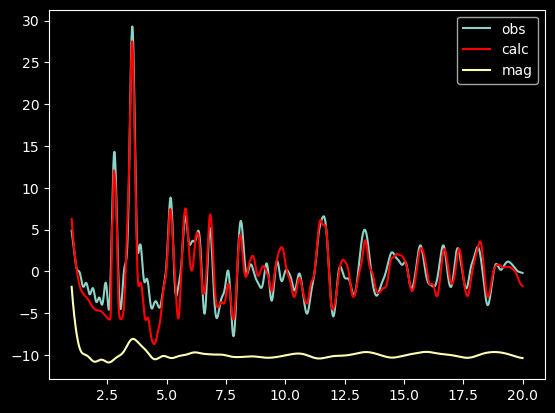

In [25]:
r, gobs, gcalc, magcalc, baseline, gdiff = r_gr_mgr(fit, mfit)

plt.plot(r, gobs, label="obs")
plt.plot(r, gcalc, label="calc", color="red")
plt.plot(r, magcalc - 10, label="mag")

plt.legend()

plt.savefig("mPDF_v1.pdf")